In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
!pip install dataprep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [3]:
df = pd.read_csv('heart_disease.csv')
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0

DataPrep Report
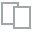
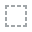
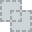
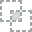
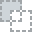
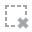
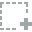
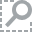
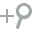
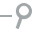
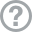
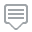
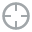
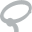
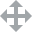
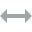
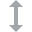
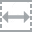
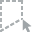
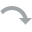
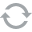
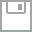
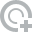
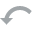
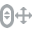
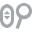
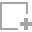
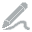
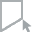
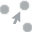
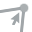
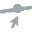

In [4]:
create_report(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.shape

(908, 13)

In [7]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [8]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak      True
slope       False
thal        False
num         False
dtype: bool

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
df[df.duplicated()].shape

(0, 13)

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, thal, num]
Index: []

In [12]:
df.age.describe()

count    908.000000
mean      53.791850
std        9.158031
min       29.000000
25%       47.750000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [13]:
df.fillna(df.median(), inplace=True)

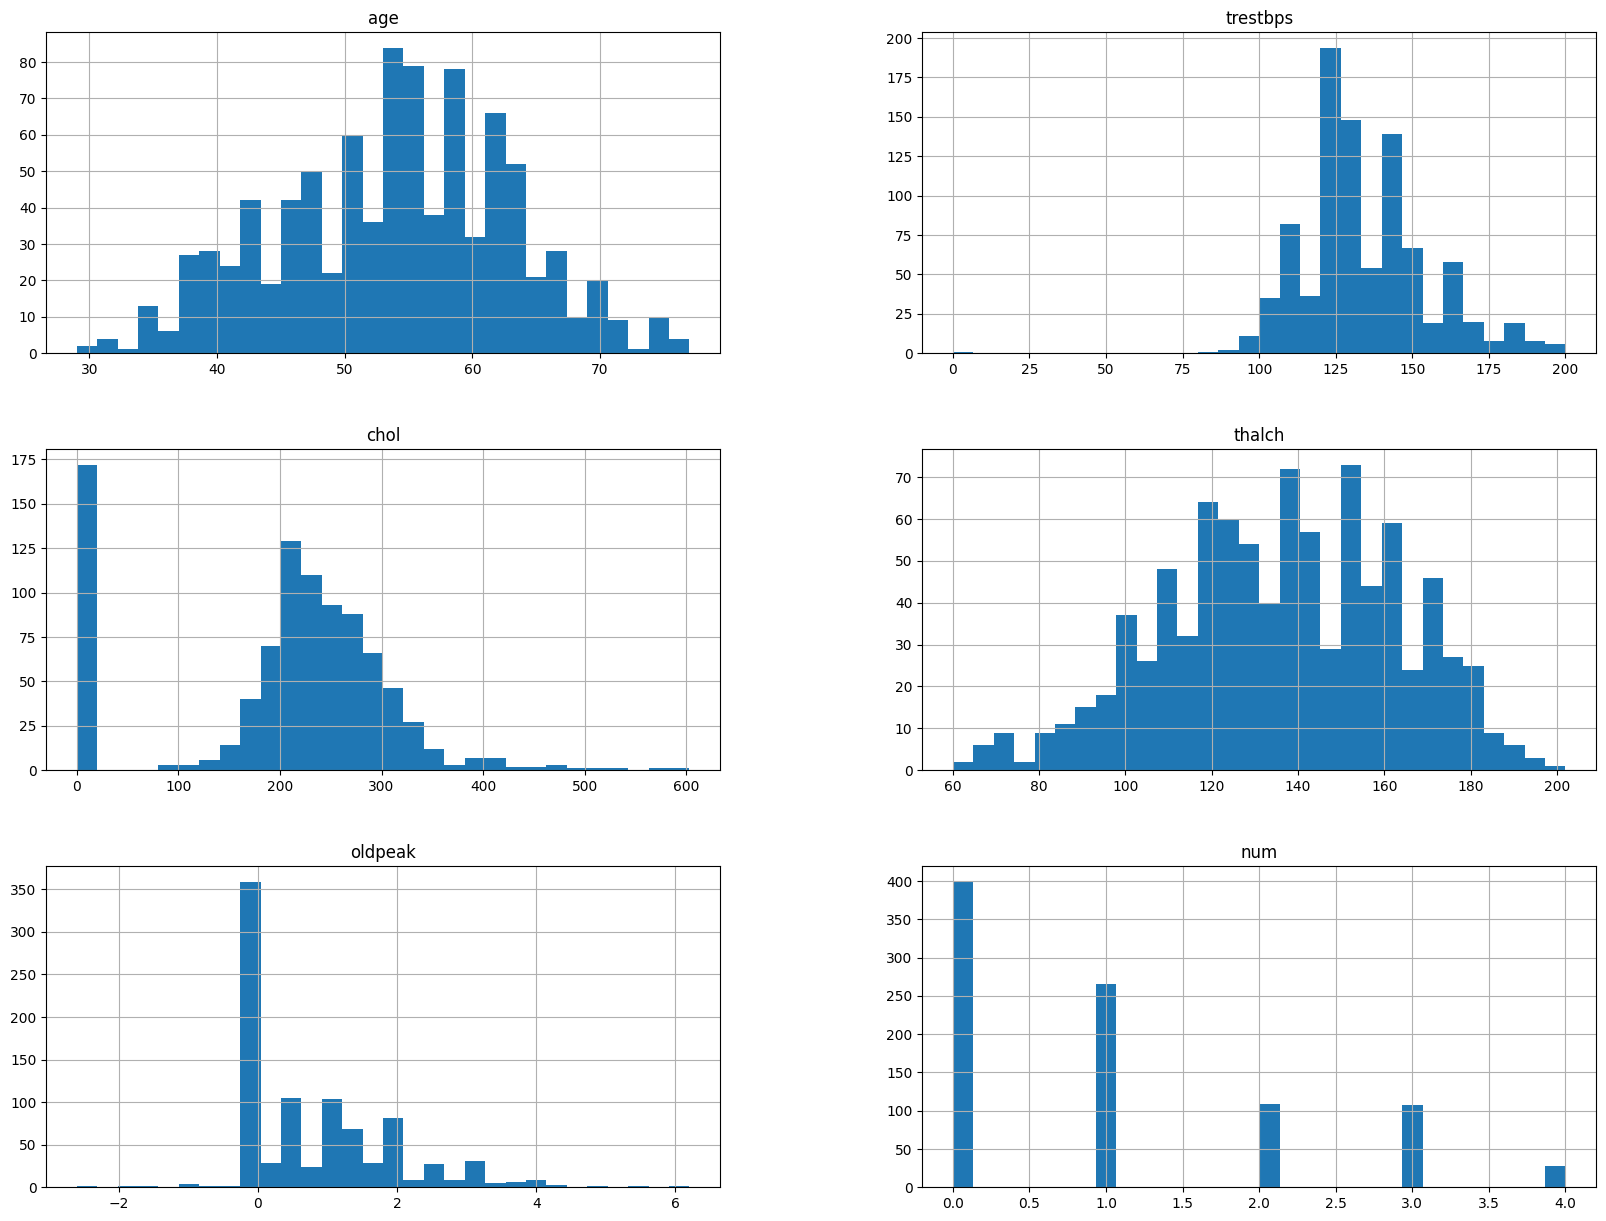

In [14]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

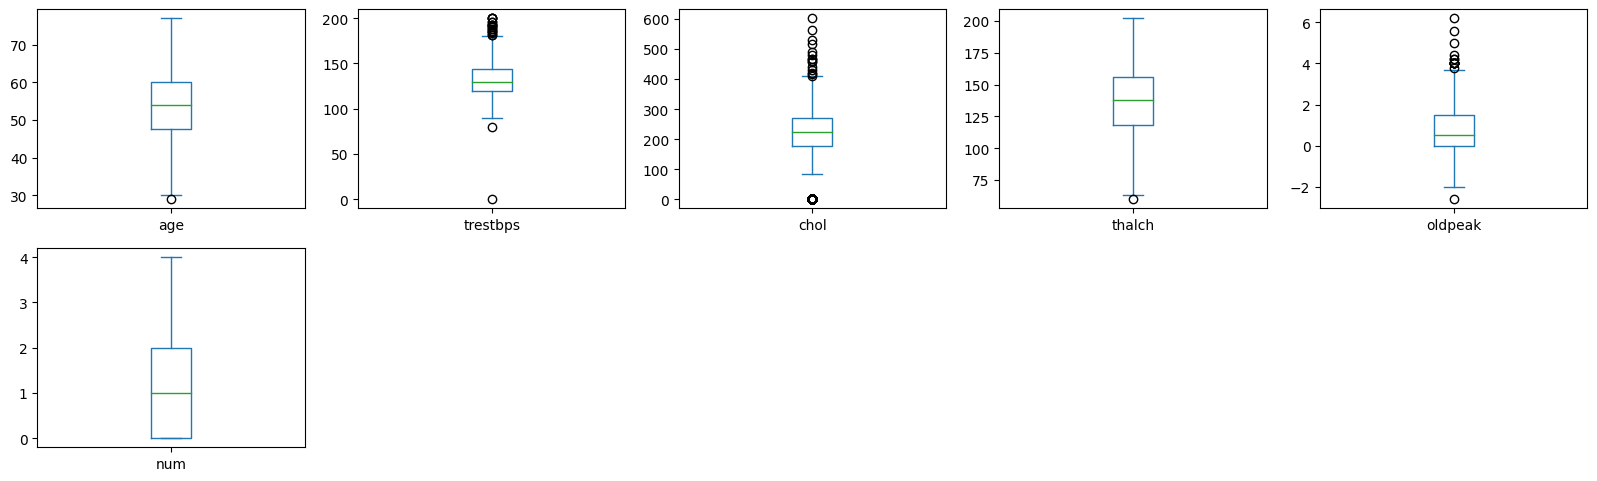

In [15]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,15), sharex=False, sharey=False)
plt.show()

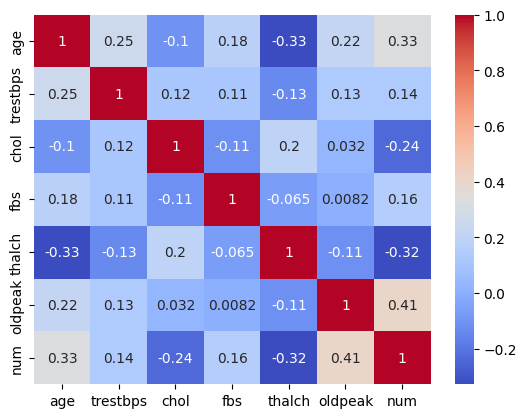

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
df.age.max()

77

In [18]:
df.age.min()

29

In [19]:
df1 = df.copy()
df1['sex'] = df1['sex'].astype('category').cat.codes
df1['cp'] = df1['cp'].astype('category').cat.codes
df1['fbs'] = df1['fbs'].astype('category').cat.codes
df1['restecg'] = df1['restecg'].astype('category').cat.codes
df1['exang'] = df1['exang'].astype('category').cat.codes
df1['slope'] = df1['slope'].astype('category').cat.codes
df1['thal'] = df1['thal'].astype('category').cat.codes
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   
906   56    1   2       144   208    1        2     105      2      0.5   
907   57    1   0       142   277    1        2     182      0      0.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3        1     0    0  
4        1     0    0  
..     ...   ...  ...  
903      2     2    4  
904      1     2    4  
905      0     1    4  
906      0     1    4  
907      1     2    4  

[908 rows x 13 columns]

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int8   
 2   cp        908 non-null    int8   
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int8   
 6   restecg   908 non-null    int8   
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int8   
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int8   
 11  thal      908 non-null    int8   
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), int8(7)
memory usage: 48.9 KB


In [21]:
df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean    53.791850    0.790749    0.777533  133.430617  201.484581    0.203744   
std      9.158031    0.406998    0.958374   20.401608  112.097949    0.403003   
min     29.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     47.750000    1.000000    0.000000  120.000000  176.750000    0.000000   
50%     54.000000    1.000000    0.000000  130.000000  224.000000    0.000000   
75%     60.000000    1.000000    2.000000  144.000000  270.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  603.000000    1.000000   

          restecg      thalch       exang     oldpeak       slope        thal  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean     0.991189  135.957048    0.450441    0.864537    1.155286    1.147577   
std      0.635177   26.804929    0.572013    1.060433    0.691023    0.771762   
min      0.000000   60.000000    0.000000   -2.600000    0.000000    0.000000   
25%      1.000000  118.000000    0.000000    0.000000    1.000000    1.000000   
50%      1.000000  138.000000    0.000000    0.500000    1.000000    1.000000   
75%      1.000000  156.000000    1.000000    1.500000    2.000000    2.000000   
max      2.000000  202.000000    2.000000    6.200000    2.000000    2.000000   

              num  
count  908.000000  
mean     1.008811  
std      1.144436  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000

In [22]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

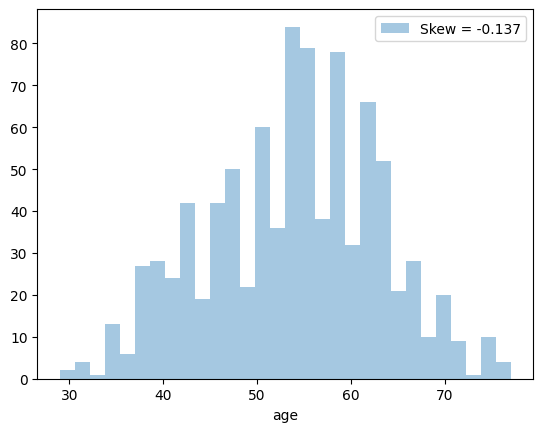

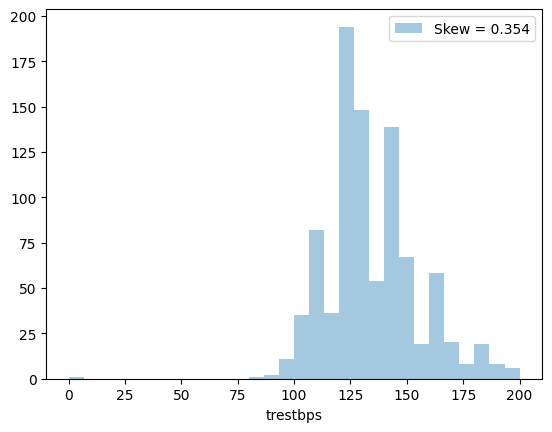

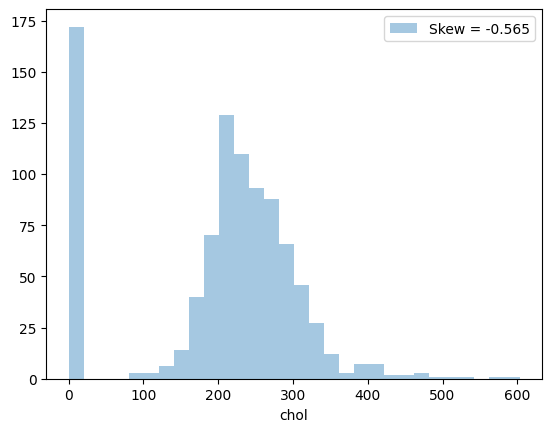

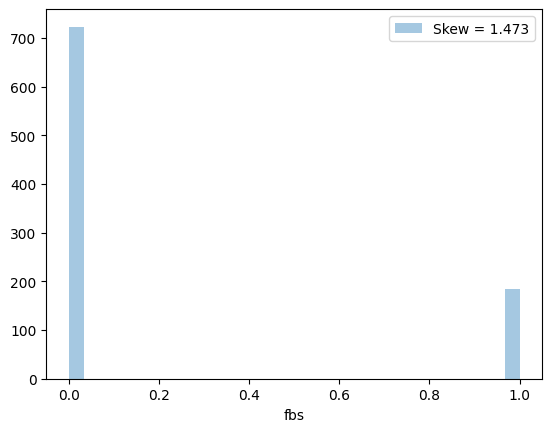

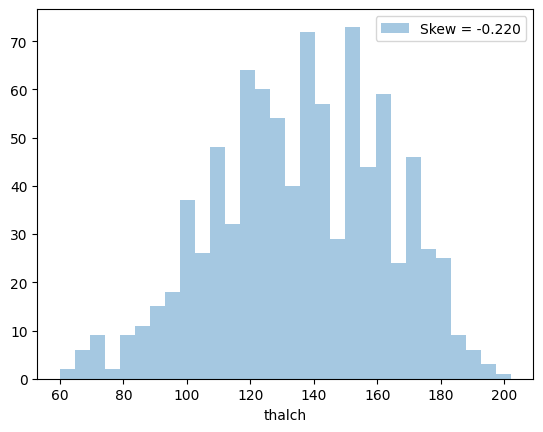

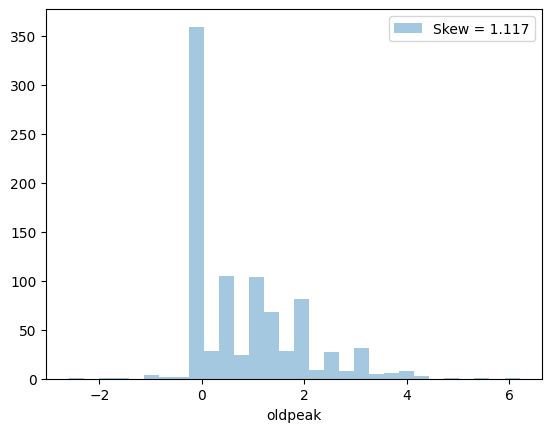

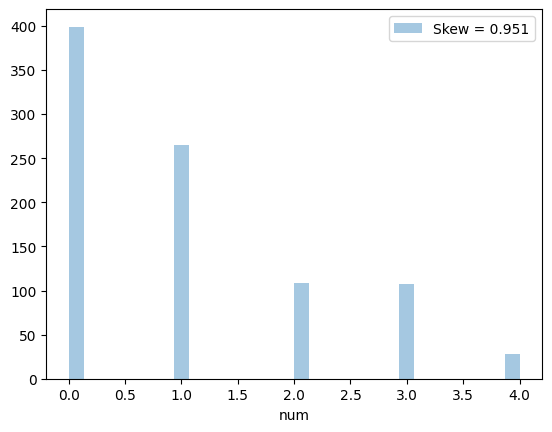

In [23]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [24]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # Check if the column contains numerical data
        if df[col].dtype in [np.int64, np.float64]:
            # 1st quartile (25%)
            Q1 = np.percentile(df[col], 25)

            # 3rd quartile (75%)
            Q3 = np.percentile(df[col],75)

            # Interquartile rrange (IQR)
            IQR = Q3 - Q1

            # outlier step
            outlier_step = 1.5 * IQR

            # Determine a list of indices of outliers for feature col
            outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

            # append the found outlier indices for col to the list of outlier indices
            outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 0 observations with more than 2 outliers


<Axes: >

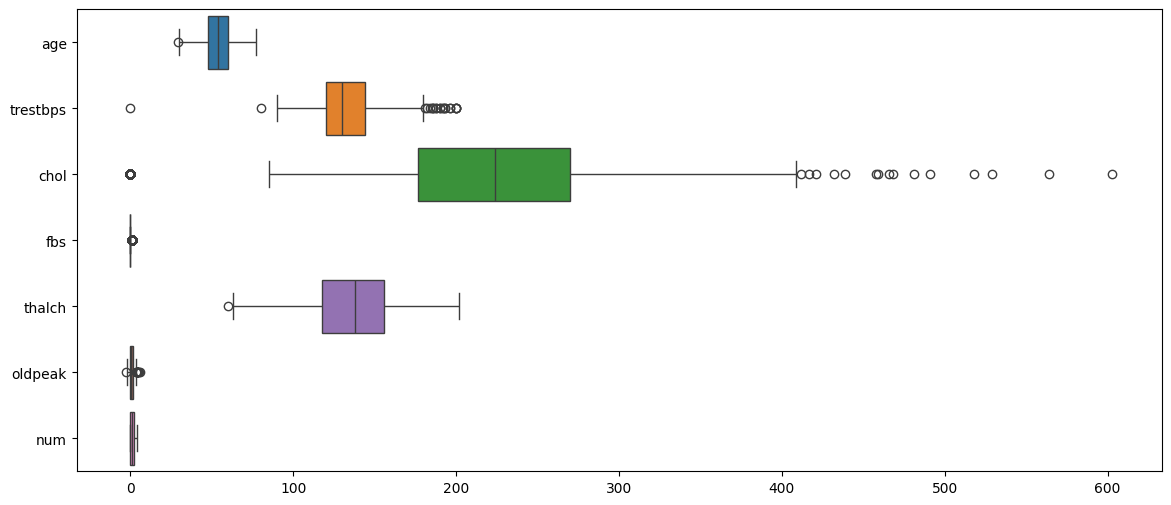

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

<Figure size 800x800 with 0 Axes>

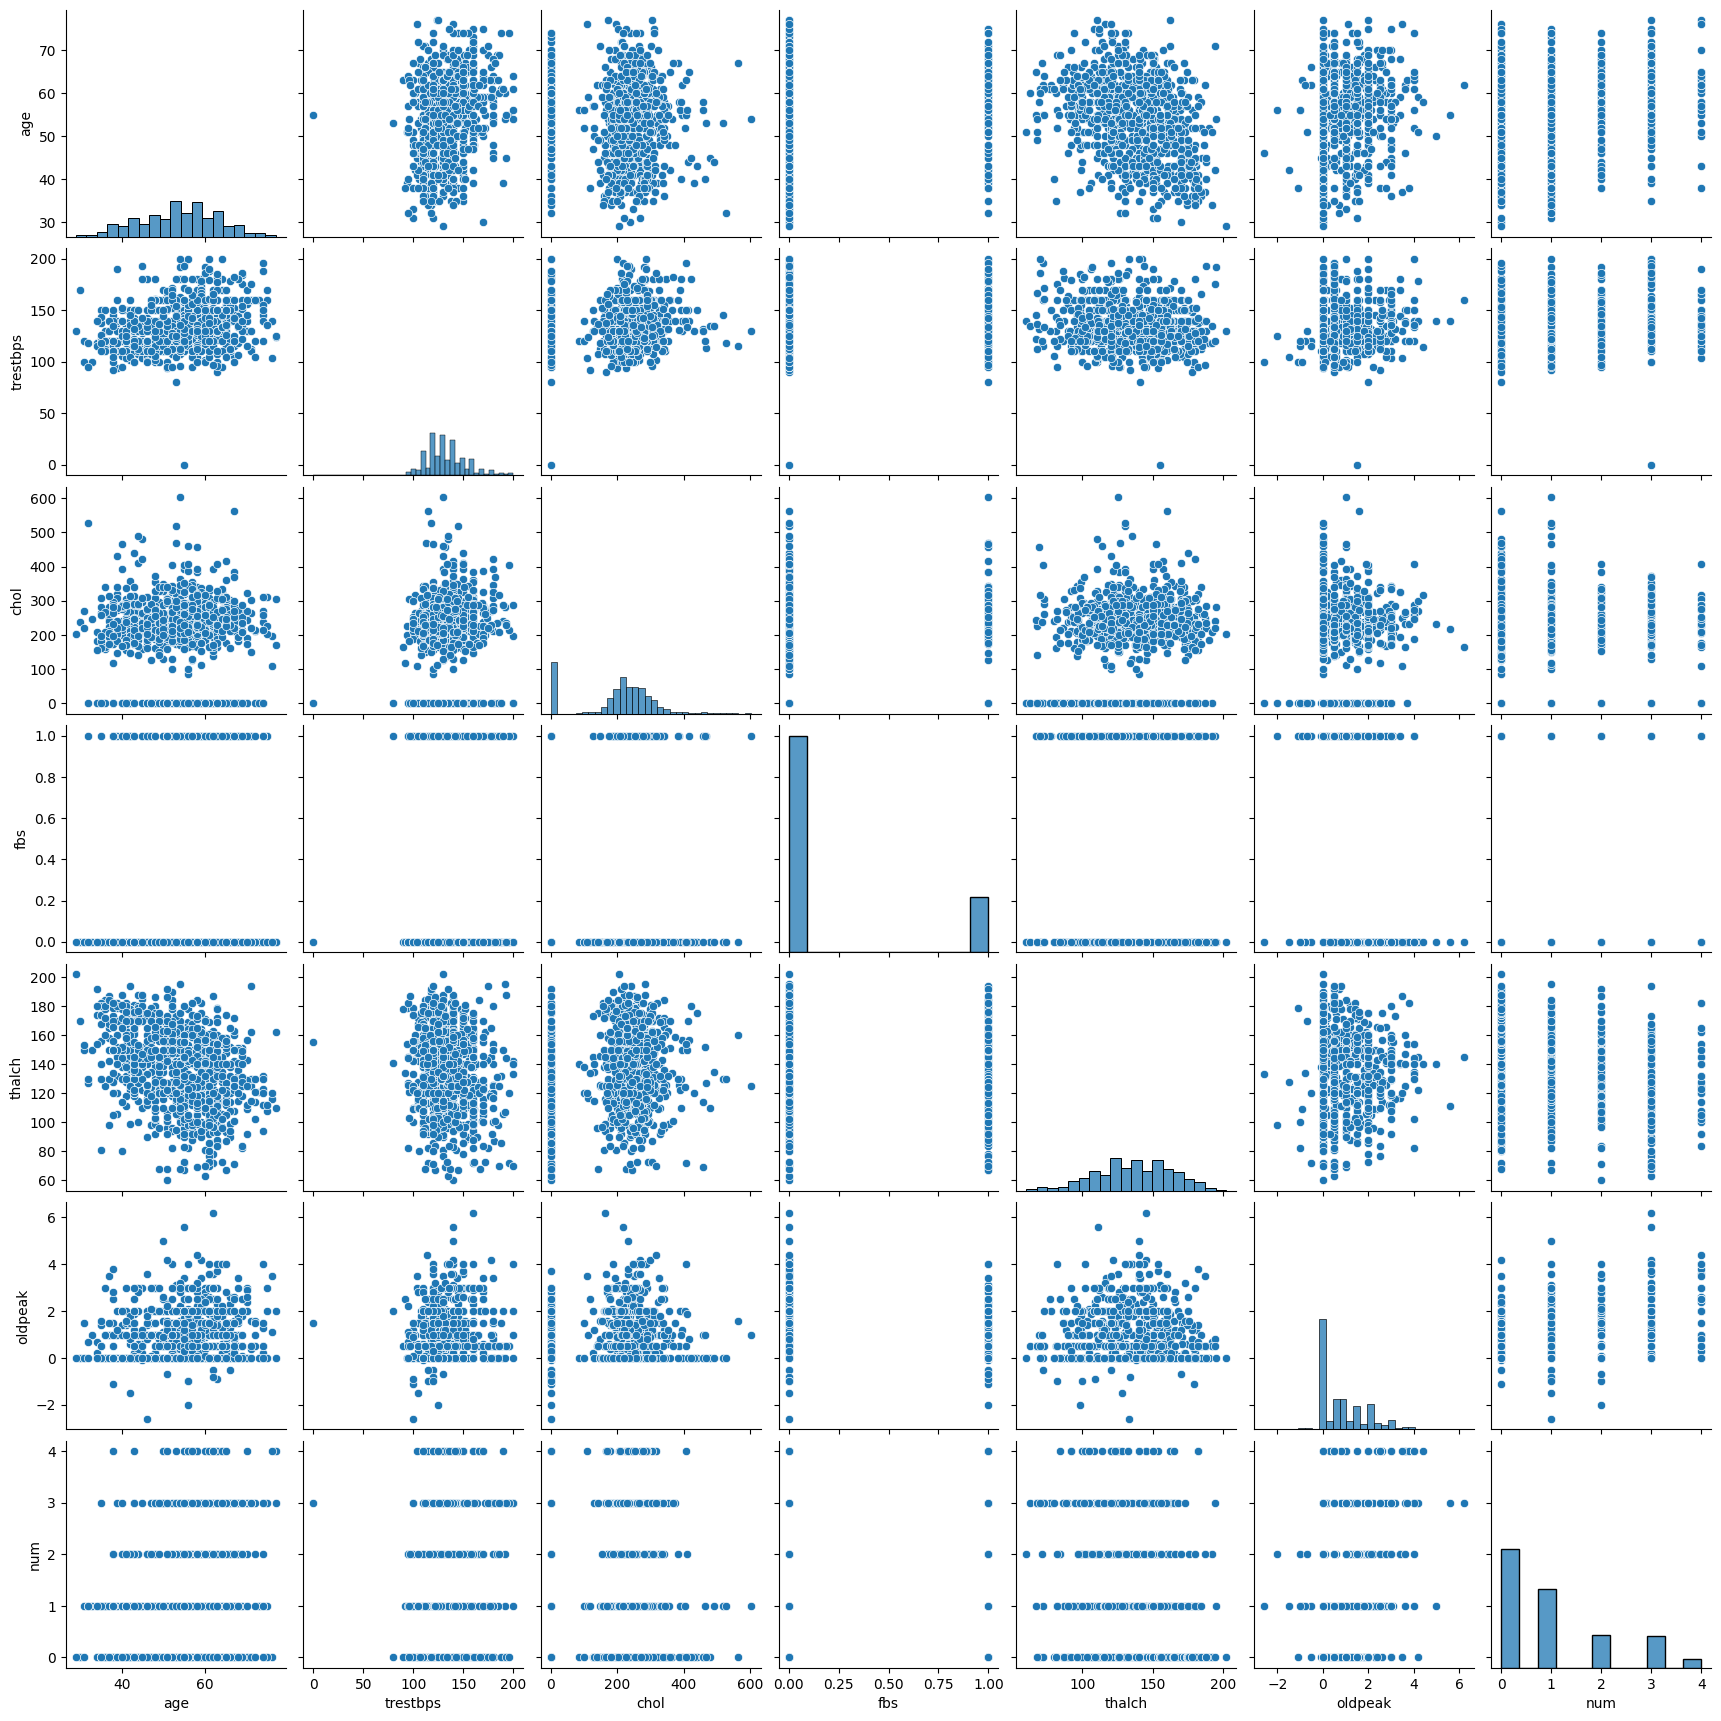

In [26]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<Axes: >

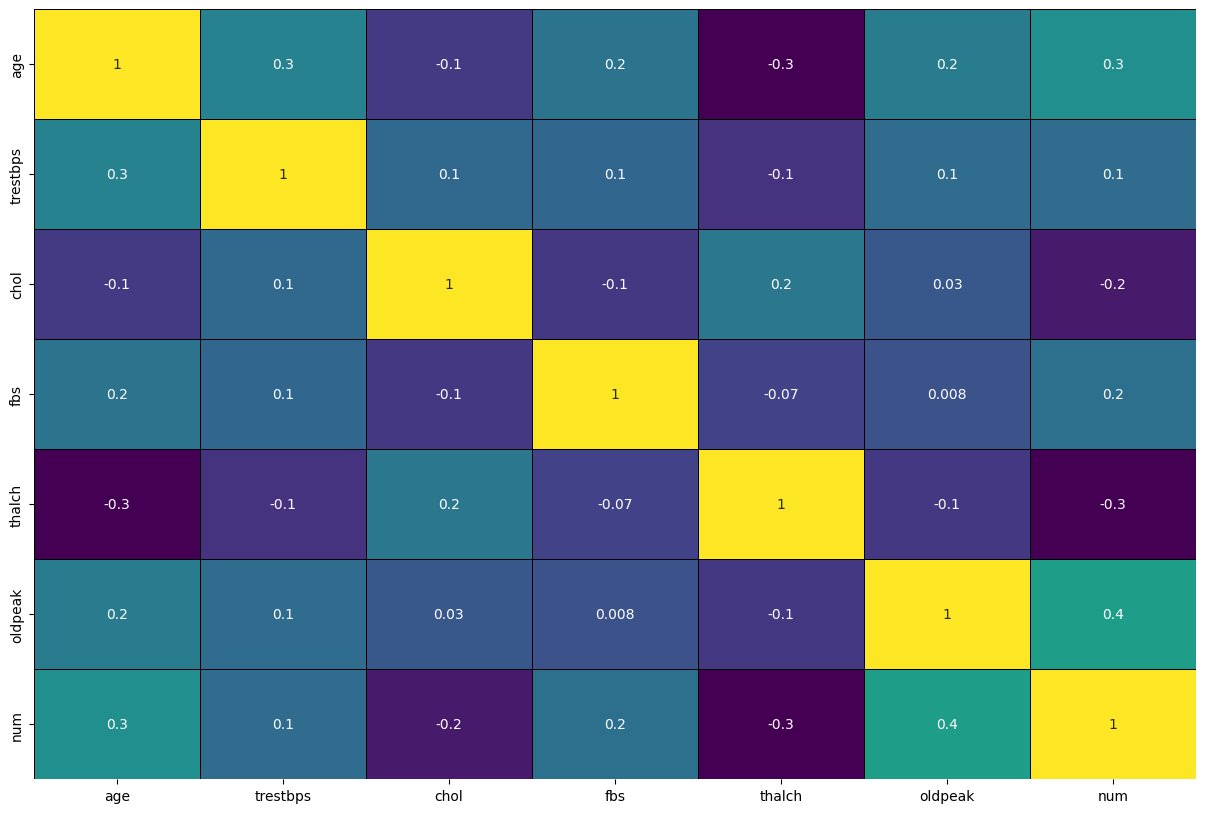

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [28]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


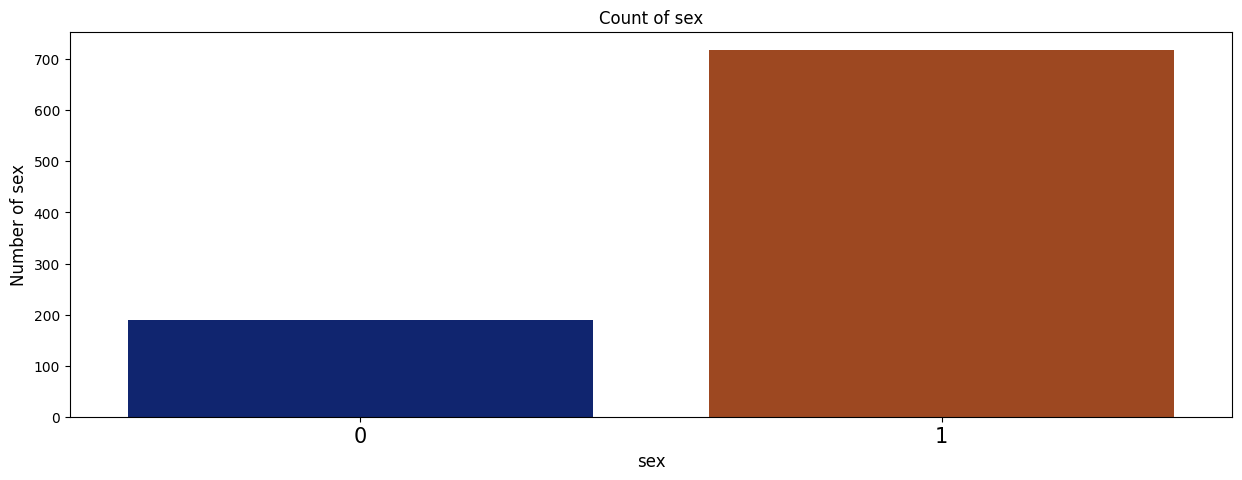

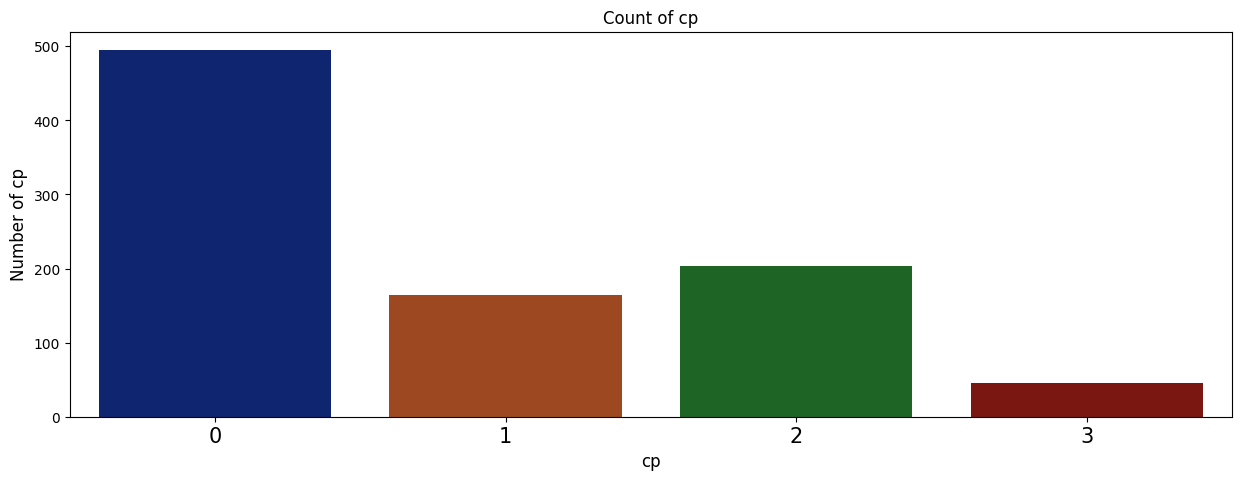

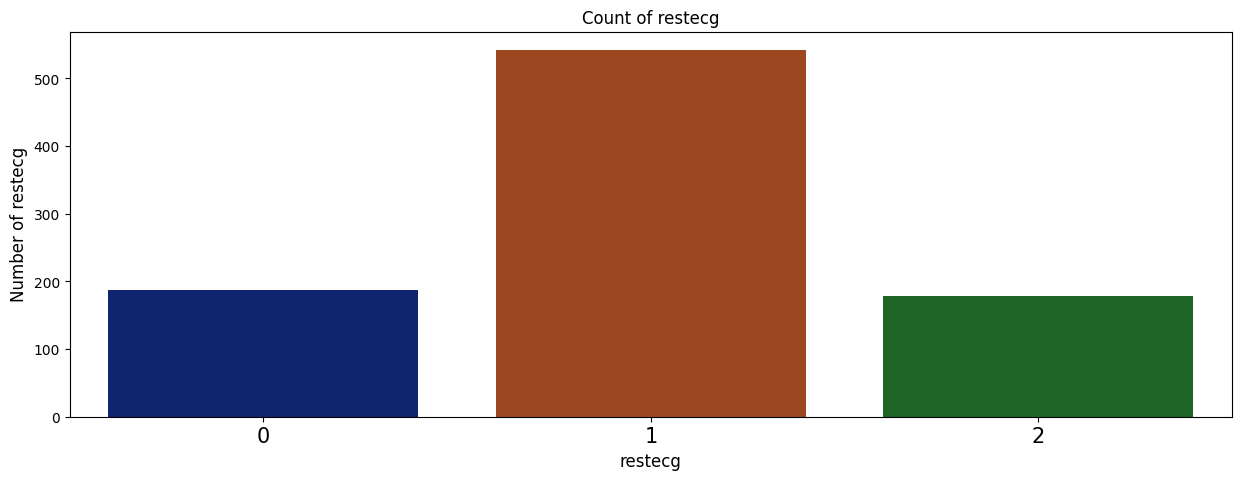

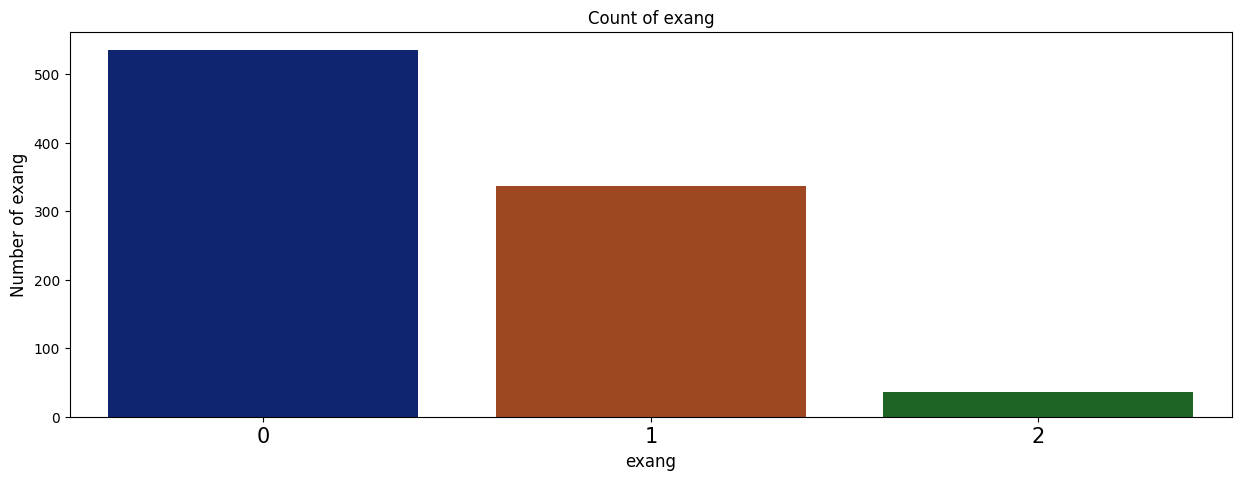

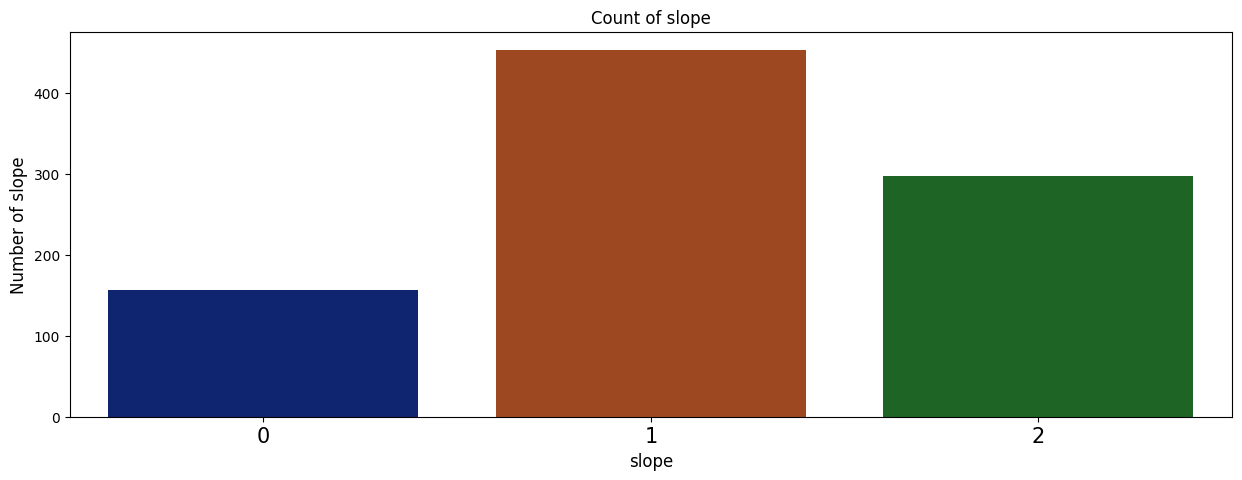

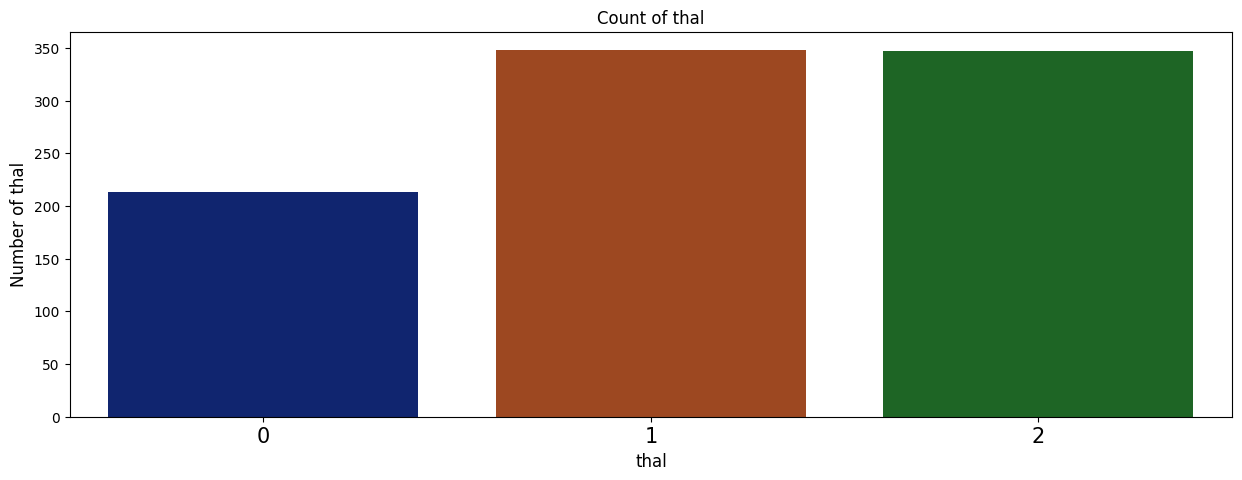

In [29]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df[column].value_counts(ascending=True);
    plt.title("Count of "+ column)
    sns.countplot(data=df1, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

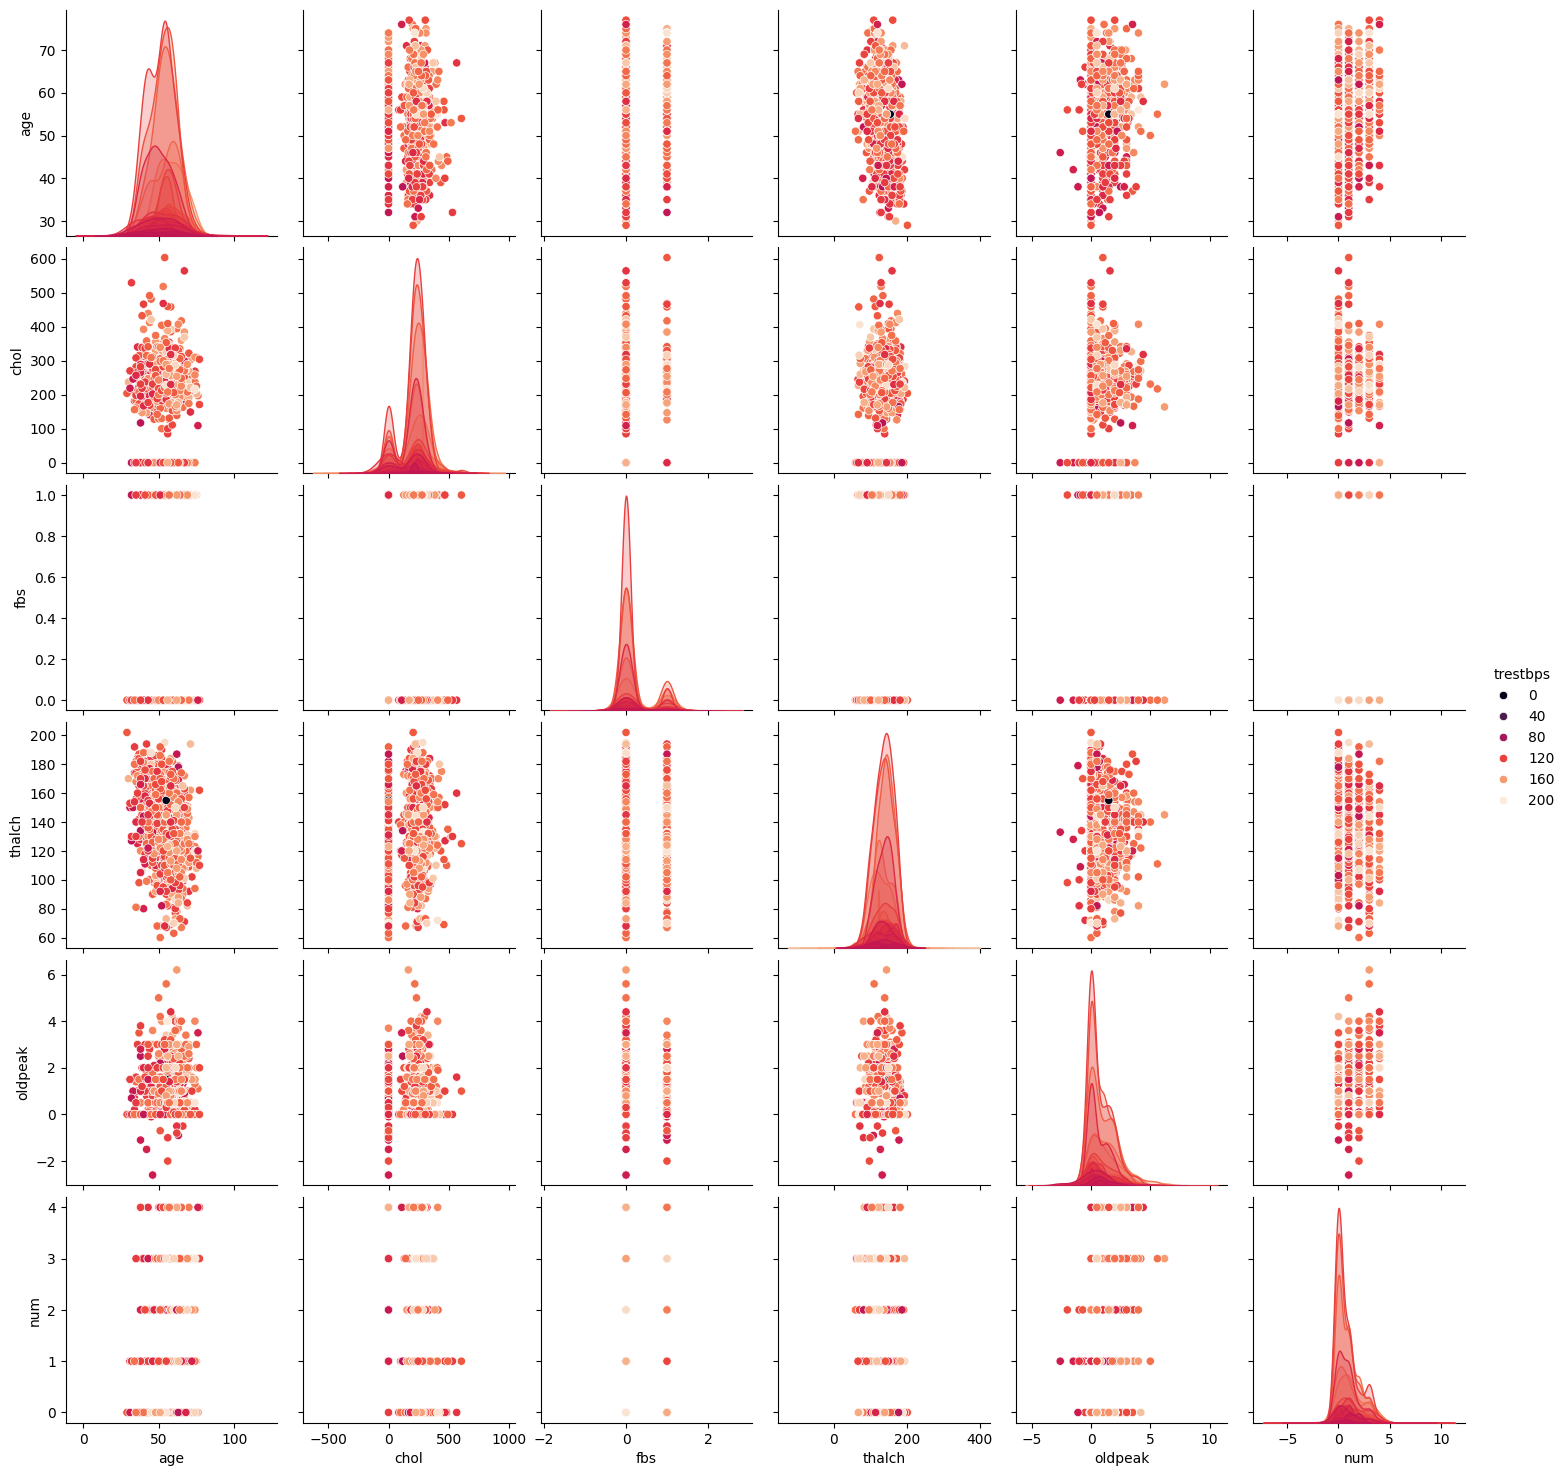

In [30]:
sns.pairplot(data = df, hue = 'trestbps', palette = 'rocket')

In [31]:
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   
906   56    1   2       144   208    1        2     105      2      0.5   
907   57    1   0       142   277    1        2     182      0      0.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3        1     0    0  
4        1     0    0  
..     ...   ...  ...  
903      2     2    4  
904      1     2    4  
905      0     1    4  
906      0     1    4  
907      1     2    4  

[908 rows x 13 columns]

In [32]:
data = df1.copy()
data.drop('age',axis = 1, inplace = True)
data = pd.get_dummies(data.iloc[:,:-1])
data.head()

sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  thal
0    1   3       145   233    1        0     150      0      2.3      0     0
1    1   1       135   203    0        1     132      0      0.0      1     0
2    1   0       140   192    0        1     148      0      0.4      1     0
3    1   3       118   186    0        0     190      0      0.0      1     0
4    1   0       110   201    0        1     126      1      1.5      1     0

Text(0.5, 1.0, 'Correlation with Sales \n')

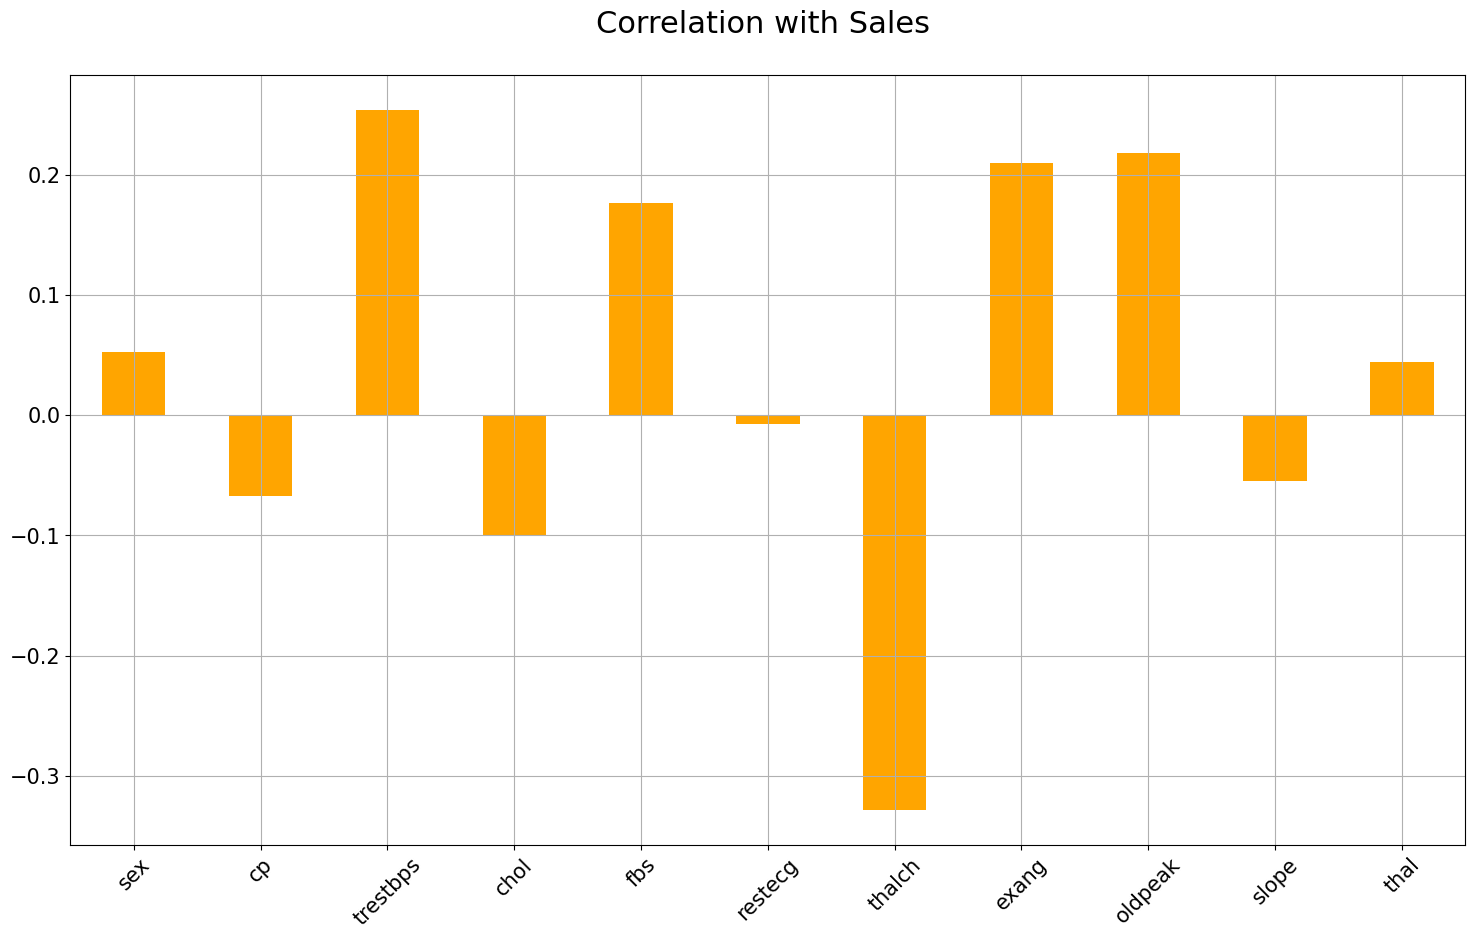

In [33]:
data2 = data.copy()

correlations = data2.corrwith(df1.age)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

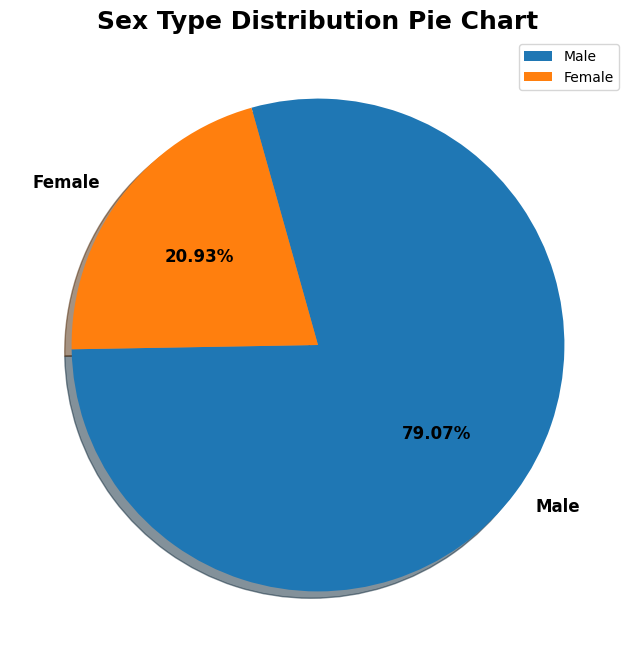

In [34]:
plt.figure(figsize = (12,8))
plt.pie(df['sex'].value_counts(),
       labels=df.sex.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Sex Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [35]:
df1.sex.value_counts()

1    718
0    190
Name: sex, dtype: int64

In [36]:
data = df1.copy()
data.drop('age',axis = 1, inplace = True)
data = pd.get_dummies(data.iloc[:,:-1])
data.head()

sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  thal
0    1   3       145   233    1        0     150      0      2.3      0     0
1    1   1       135   203    0        1     132      0      0.0      1     0
2    1   0       140   192    0        1     148      0      0.4      1     0
3    1   3       118   186    0        0     190      0      0.0      1     0
4    1   0       110   201    0        1     126      1      1.5      1     0

In [37]:
data['age'] = df1.age
data.head()

sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  thal  \
0    1   3       145   233    1        0     150      0      2.3      0     0   
1    1   1       135   203    0        1     132      0      0.0      1     0   
2    1   0       140   192    0        1     148      0      0.4      1     0   
3    1   3       118   186    0        0     190      0      0.0      1     0   
4    1   0       110   201    0        1     126      1      1.5      1     0   

   age  
0   63  
1   41  
2   57  
3   52  
4   57

In [38]:
le = LabelEncoder()
le.fit(data['age'])
data['age'] = le.transform(data['age'])
data.head()

sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  thal  \
0    1   3       145   233    1        0     150      0      2.3      0     0   
1    1   1       135   203    0        1     132      0      0.0      1     0   
2    1   0       140   192    0        1     148      0      0.4      1     0   
3    1   3       118   186    0        0     190      0      0.0      1     0   
4    1   0       110   201    0        1     126      1      1.5      1     0   

   age  
0   34  
1   12  
2   28  
3   23  
4   28

In [39]:
x = data.iloc[:,:-1]
y = data.age


In [43]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)

# Scale the data to be non-negative using MinMaxScaler
scaler = MinMaxScaler() # create a scaler object
x_scaled = scaler.fit_transform(x) # fit and transform the data

fit = test.fit(x_scaled, y) # use the scaled data for feature selection

In [44]:
scores = fit.scores_

features = fit.transform(x_scaled)

In [47]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Scores', 'Feature'])
score_df.sort_values(by="Scores", ascending=False, inplace=True)
score_df

Scores   Feature
4   61.086894       fbs
7   29.684040     exang
1   21.992807        cp
10  14.628128      thal
9   13.921157     slope
0   12.078844       sex
6    9.389791    thalch
5    8.640719   restecg
3    6.462126      chol
8    2.540432   oldpeak
2    1.465310  trestbps

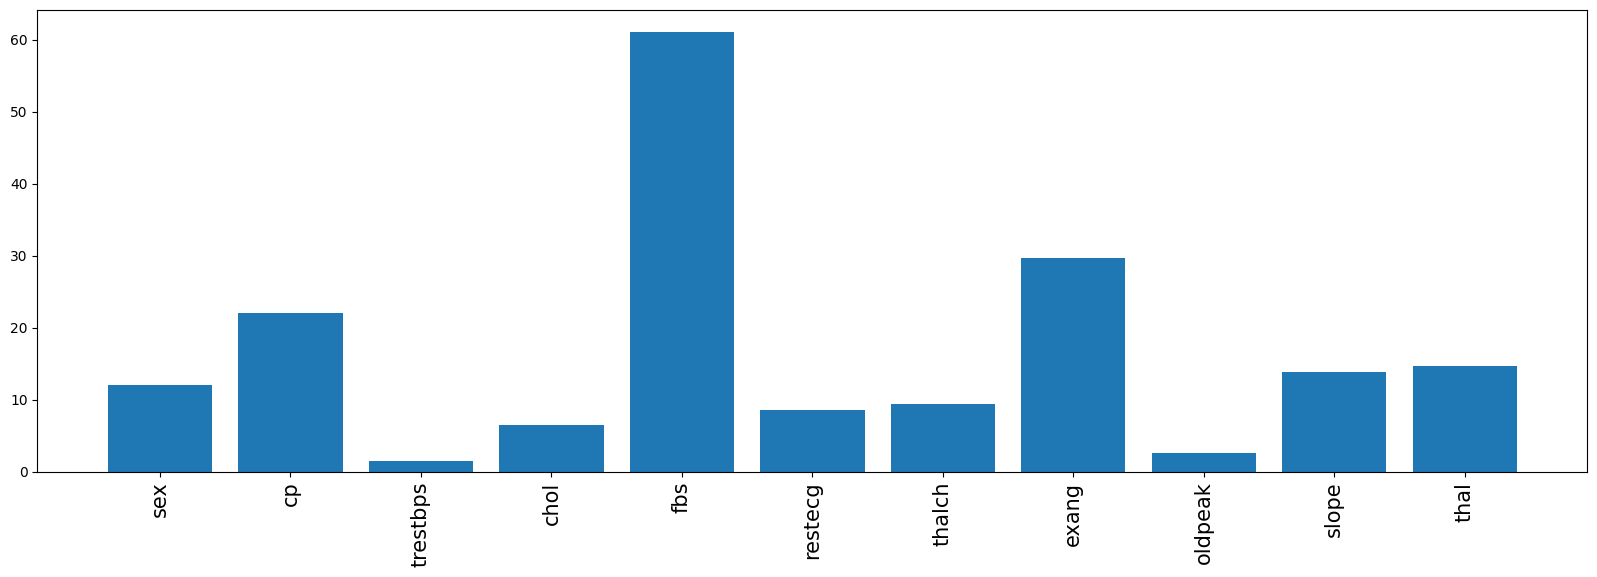

In [49]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

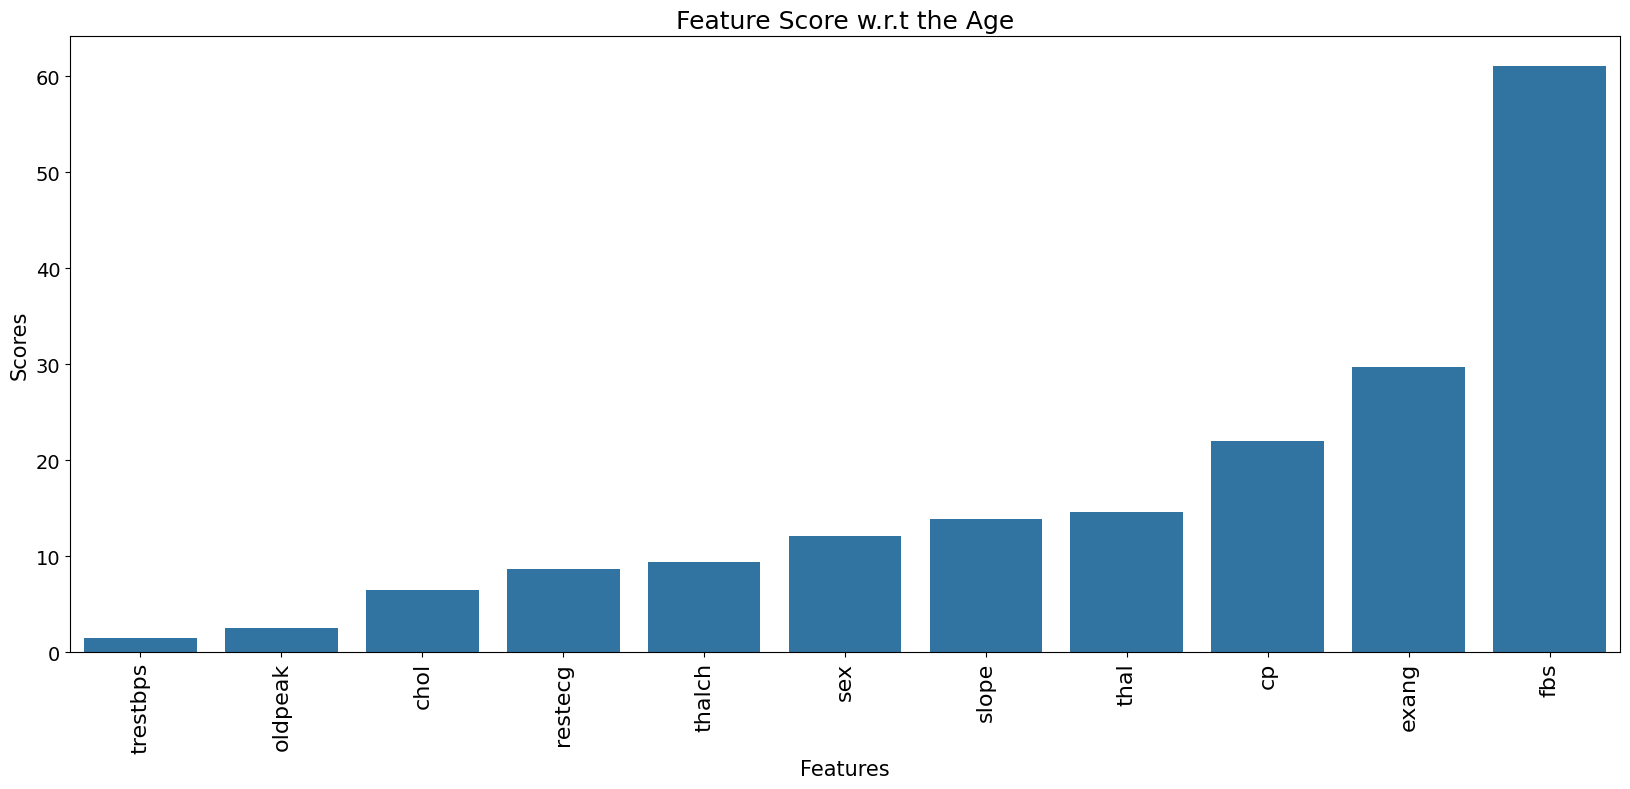

In [51]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Scores",
            data=score_df,
            order=score_df.sort_values('Scores').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Age", size=18)
plt.show()

In [53]:
model_data = data[['fbs','exang','cp','thal','slope','sex','thalch',
                   'restecg','chol','oldpeak','age']]
model_data.head()

fbs  exang  cp  thal  slope  sex  thalch  restecg  chol  oldpeak  age
0    1      0   3     0      0    1     150        0   233      2.3   34
1    0      0   1     0      1    1     132        1   203      0.0   12
2    0      0   0     0      1    1     148        1   192      0.4   28
3    0      0   3     0      1    1     190        0   186      0.0   23
4    0      1   0     0      1    1     126        1   201      1.5   28

In [54]:
x = model_data.drop('age',axis = 1)
y = model_data['age']

In [55]:
y.unique()

array([34, 12, 28, 23, 37, 27, 19, 24,  1, 25,  8, 17, 39, 47, 29, 13, 35,
       42, 40, 16, 15, 10, 33, 21, 26, 20, 14, 22,  7, 30, 32, 31, 38, 41,
       18, 36,  9,  5,  6,  0, 45, 46, 11, 43,  2, 44,  4,  3, 48])

In [56]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for train_ix, test_ix in skf.split(x, y):
  train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
  train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({25: 46, 29: 39, 26: 37, 27: 35, 28: 34, 23: 33, 22: 32, 30: 32, 33: 31, 24: 30, 32: 28, 31: 28, 34: 27, 19: 27, 21: 23, 12: 22, 17: 21, 14: 21, 35: 20, 20: 20, 36: 19, 15: 17, 18: 17, 13: 16, 16: 16, 9: 15, 10: 14, 38: 14, 40: 12, 11: 12, 37: 11, 8: 10, 39: 9, 6: 8, 41: 6, 45: 6, 7: 5, 42: 4, 5: 3, 46: 3, 43: 3, 47: 2, 2: 2, 3: 2, 48: 2, 1: 1, 0: 1, 44: 1, 4: 1}) Testing Data Counter({25: 5, 19: 4, 29: 4, 33: 4, 31: 4, 28: 4, 26: 4, 24: 3, 30: 3, 27: 3, 23: 3, 32: 3, 14: 3, 17: 3, 22: 3, 34: 3, 37: 2, 12: 2, 16: 2, 18: 2, 13: 2, 36: 2, 15: 2, 20: 2, 21: 2, 35: 2, 8: 1, 42: 1, 10: 1, 5: 1, 6: 1, 11: 1, 7: 1, 41: 1, 9: 1, 39: 1, 45: 1, 43: 1, 40: 1, 38: 1})


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (726, 10)
Shape of X_test:  (182, 10)
Shape of y_train:  (726,)
Shape of y_test (182,)


In [60]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [61]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 6.97%
_______________________________________________
CLASSIFICATION REPORT:
             0    1    2    3    4    5    6    7     8     9  ...   42   43  \
precision  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  0.0   
recall     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  0.0   
f1-score   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  0.0   
support    1.0  1.0  2.0  2.0  1.0  3.0  8.0  5.0  10.0  15.0  ...  4.0  3.0   

            44   45   46   47   48  accuracy   macro avg  weighted avg  
precision  0.0  0.0  0.0  0.0  0.0  0.069682    0.002840      0.007243  
recall     0.0  0.0  0.0  0.0  0.0  0.069682    0.027359      0.069682  
f1-score   0.0  0.0  0.0  0.0  0.0  0.069682    0.005146      0.013121  
support  

In [62]:
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_x, train_y, cv=skf)
print(results.mean())

0.042788316772056606


In [63]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_x,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [64]:
grid.best_score_

0.05868714242697983

In [65]:
predict_output = model.predict(test_x)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.05555555555555555

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         2
          22       0.00    

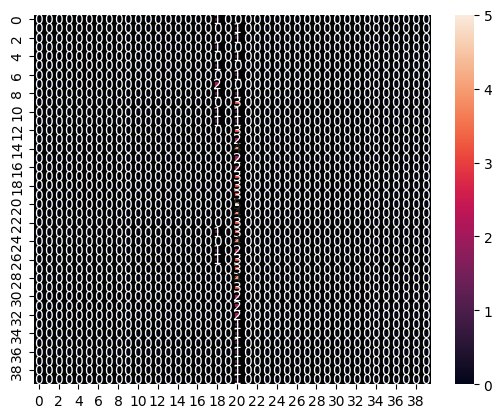

In [66]:
sns.heatmap(confusion_matrix(test_y, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(test_y,predict_output))

In [67]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 15.29%
_______________________________________________
CLASSIFICATION REPORT:
             0    1    2    3    4    5    6    7    8          9  ...   42  \
precision  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.125000  ...  0.0   
recall     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.153846  ...  0.0   
f1-score   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.137931  ...  0.0   
support    1.0  1.0  2.0  1.0  1.0  4.0  9.0  4.0  8.0  13.000000  ...  5.0   

            43   44   45   46   47   48  accuracy   macro avg  weighted avg  
precision  0.0  0.0  0.0  0.0  0.0  0.0  0.152893    0.072717      0.112468  
recall     0.0  0.0  0.0  0.0  0.0  0.0  0.152893    0.108383      0.152893  
f1-score   0.0  0.0  0.0  0.0  0.0  0.0  0.152893    0.081548      0

In [68]:
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.04402587519025876


In [69]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [70]:
grid.best_score_

0.05498477929984778

In [71]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.06593406593406594

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         6
          15       0.33      0.20      0.25         5
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         6
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         5
          22       0.20    

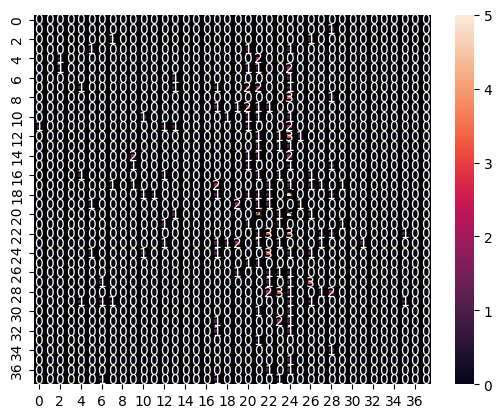

In [72]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

In [73]:
x = model_data.drop(['age'],axis = 1)
y = model_data['age']


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (726, 10)
Shape of X_test:  (182, 10)
Shape of y_train:  (726,)
Shape of y_test (182,)


In [81]:
best_params = grid.best_estimator_
best_model = grid.best_score_
print("\nBest Parameters:", best_params)


Best Parameters: DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4)


**Interview Questions**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision trees have several hyperparameters that can significantly affect the model’s performance. Here are some of the most common hyperparameters along with their impact:

1. max_depth:
Description: This parameter controls the maximum depth of the tree (i.e., the longest path from the root to a leaf node).
Effect:
A larger max_depth allows the tree to learn more intricate patterns but increases the risk of overfitting (fitting noise or small variations in the data).
A smaller max_depth restricts the tree, reducing the chance of overfitting but may lead to underfitting, where the model is too simple to capture important patterns.
2. min_samples_split:
Description: Specifies the minimum number of samples required to split an internal node.
Effect:
A smaller value allows the model to split nodes even with fewer samples, leading to more splits and deeper trees, increasing the risk of overfitting.
Larger values prevent the tree from making splits with few samples, which can prevent overfitting but may result in underfitting if set too high.
3. min_samples_leaf:
Description: Defines the minimum number of samples required to be at a leaf node.
Effect:
Smaller values create deeper trees and can lead to overfitting.
Larger values result in shallower trees, reducing variance but potentially increasing bias, which can lead to underfitting.
4. max_features:
Description: The maximum number of features to consider when looking for the best split.
Effect:
Using fewer features at each split can reduce the model’s variance, preventing overfitting but possibly increasing bias.
Using more features increases the model's variance but reduces bias. In extreme cases, if all features are used (max_features = 'auto'), it can lead to overfitting.
5. max_leaf_nodes:
Description: Limits the number of leaf nodes in the tree.
Effect:
Fewer leaf nodes force the tree to generalize more, reducing overfitting but increasing bias.
More leaf nodes allow the tree to learn more details but can lead to overfitting.
6. min_impurity_decrease (or min_impurity_split in older versions):
Description: The minimum decrease in impurity required to split a node.
Effect:
Higher values lead to fewer splits, making the tree simpler and reducing overfitting, but may also result in underfitting.
Lower values allow more splits, which may increase the risk of overfitting.
7. criterion:
Description: This specifies the function to measure the quality of a split. Common choices are:
For classification: gini (Gini impurity) and entropy (information gain).
For regression: mse (mean squared error), mae (mean absolute error).
Effect:
The choice of criterion can slightly influence the splits made by the tree. For example, gini tends to be faster, while entropy can sometimes create more balanced trees.
8. splitter:
Description: Specifies the strategy used to split at each node:
best: Chooses the best split among all features.
random: Chooses a random subset of features.
Effect:
best results in a more accurate but potentially slower model.
random can be faster and help introduce some randomness, which may be useful in ensemble methods to reduce overfitting.
9. class_weight (for classification tasks):
Description: Weights associated with classes to handle imbalanced datasets.
Effect:
By assigning higher weights to minority classes, the model can focus more on underrepresented classes, which helps in improving performance on imbalanced datasets.
Summary of Effects:
Overfitting occurs when the tree is too deep or splits too frequently, capturing noise and overly specific patterns in the training data.
Underfitting happens when the tree is too shallow or constrained, failing to capture the underlying patterns in the data.
By carefully tuning these hyperparameters, you can achieve a good balance between bias and variance, improving the generalization performance of the model.

**2. What is the difference between the Label encoding and One-hot encoding?**

The key difference between Label Encoding and One-Hot Encoding lies in how they transform categorical variables into numerical formats, which machine learning models can process.

1. Label Encoding:
Description: Label Encoding assigns a unique integer to each category in a categorical feature.
Example: For a categorical feature like "Color" with categories [Red, Blue, Green], label encoding might map them as:
Red → 0
Blue → 1
Green → 2
Use Case: Label Encoding is useful when the categories have an inherent order or ranking (ordinal features). For instance, if you have categories like "Low", "Medium", and "High", you can encode them as 0, 1, and 2, respectively.
Downside: For non-ordinal features (where categories don’t have a natural order), label encoding can be problematic because the model might mistakenly interpret the integers as having some sort of magnitude or order, potentially leading to poor model performance.
2. One-Hot Encoding:
Description: One-Hot Encoding creates a binary (0 or 1) column for each category. Each category is represented as a separate column, and the value is set to 1 in the column corresponding to the category.
Example: For the "Color" feature with categories [Red, Blue, Green], One-Hot Encoding would create the following:
Red → [1, 0, 0]
Blue → [0, 1, 0]
Green → [0, 0, 1]
Use Case: One-Hot Encoding is suitable for nominal features, where categories don’t have any natural order or ranking (e.g., "Color", "Country"). It prevents the model from inferring an incorrect relationship between categories.
Downside: One-Hot Encoding increases the dimensionality of the dataset, especially when dealing with categorical features that have many unique values (e.g., thousands of cities or product codes). This can lead to increased computational cost and possibly overfitting in some models.
Given a categorical feature "Fruit" with categories [Apple, Banana, Orange]:

Label Encoding:
Apple → 0
Banana → 1
Orange → 2
One-Hot Encoding:
Apple → [1, 0, 0]
Banana → [0, 1, 0]
Orange → [0, 0, 1]
Label Encoding is more compact, but One-Hot Encoding is often more appropriate for non-ordinal categorical features since it avoids introducing false ordinal relationships.